<a href="https://colab.research.google.com/github/Saran4B/MachineLearning/blob/main/German%20Credit%20Prediction/German_Credit_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#German Credit Data Analysis

###Content :
- Model Approval ( Approved or Denied )

###Data Analysis techniques :
- Explanatory Data Analysis(EDA) is utillized to perform data analytics.

- Machine Learning technique applied to make a model prediction.

###Summary of results :

- The best model for credit approval by accuracy and AUC is Random Forest.


###Data Description :

- Data was collect by https://online.stat.psu.edu/stat857/node/215/

###Creditability Status :

- Non-Creditiable (0), Creditiable (1)

###Data Validation for modeling :

- Observations : 1,000

- Variables : 21

- Discrete Variable : 18

- Continuous Variable : 3

###Programming Language :

Training models base on sklearn package with Python



In [ ]:
## Import the Standard operational packages.
import pandas as pd
import numpy as np

## Import visualization packages.
import matplotlib.pyplot as plt
import seaborn as sns

## Import Pre-Process Packages.
from sklearn.model_selection import train_test_split

## Import evaluate package.
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
confusion_matrix, ConfusionMatrixDisplay, auc, roc_curve, RocCurveDisplay,classification_report

# function for ML model
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# This is the function that helps plot feature importance
from xgboost import plot_importance

#### 1.Import Dataset

In [ ]:
df = pd.read_csv('index.csv')

In [ ]:
df.head(5)

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account Balance                    1000 non-null   int64
 2   Duration of Credit (month)         1000 non-null   int64
 3   Payment Status of Previous Credit  1000 non-null   int64
 4   Purpose                            1000 non-null   int64
 5   Credit Amount                      1000 non-null   int64
 6   Value Savings/Stocks               1000 non-null   int64
 7   Length of current employment       1000 non-null   int64
 8   Instalment per cent                1000 non-null   int64
 9   Sex & Marital Status               1000 non-null   int64
 10  Guarantors                         1000 non-null   int64
 11  Duration in Current address        1000 non-null   int64
 12  Most valuable availab

In [ ]:
df.shape

(1000, 21)

In [ ]:
df.isna().sum()

Creditability                        0
Account Balance                      0
Duration of Credit (month)           0
Payment Status of Previous Credit    0
Purpose                              0
Credit Amount                        0
Value Savings/Stocks                 0
Length of current employment         0
Instalment per cent                  0
Sex & Marital Status                 0
Guarantors                           0
Duration in Current address          0
Most valuable available asset        0
Age (years)                          0
Concurrent Credits                   0
Type of apartment                    0
No of Credits at this Bank           0
Occupation                           0
No of dependents                     0
Telephone                            0
Foreign Worker                       0
dtype: int64

In [ ]:
df1 = df.copy()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account Balance                    1000 non-null   int64
 2   Duration of Credit (month)         1000 non-null   int64
 3   Payment Status of Previous Credit  1000 non-null   int64
 4   Purpose                            1000 non-null   int64
 5   Credit Amount                      1000 non-null   int64
 6   Value Savings/Stocks               1000 non-null   int64
 7   Length of current employment       1000 non-null   int64
 8   Instalment per cent                1000 non-null   int64
 9   Sex & Marital Status               1000 non-null   int64
 10  Guarantors                         1000 non-null   int64
 11  Duration in Current address        1000 non-null   int64
 12  Most valuable availab

#### 2.Exploratory Data Analysis (EDA) and Pre-Process

In [ ]:
### Value Count %
### Count Discrete Variable
data_for_count = df1.drop(['Credit Amount', 'Age (years)', 'Duration of Credit (month)'], axis=1)

def count_values(data) :
    for col in data:
      table = pd.DataFrame(data[col].value_counts(normalize=True))
      table2 = pd.DataFrame(print(table.transpose()))
    return table2

count_values(data_for_count)

Creditability    1    0
proportion     0.7  0.3
Account Balance      4      1      2      3
proportion       0.394  0.274  0.269  0.063
Payment Status of Previous Credit     2      4      3      1     0
proportion                         0.53  0.293  0.088  0.049  0.04
Purpose       3      0      2      1      9     6      5      10     4      8 
proportion  0.28  0.234  0.181  0.103  0.097  0.05  0.022  0.012  0.012  0.009
Value Savings/Stocks      1      5      2      3      4
proportion            0.603  0.183  0.103  0.063  0.048
Length of current employment      3      5      4      2      1
proportion                    0.339  0.253  0.174  0.172  0.062
Instalment per cent      4      2      3      1
proportion           0.476  0.231  0.157  0.136
Sex & Marital Status      3     2      4     1
proportion            0.548  0.31  0.092  0.05
Guarantors      1      3      2
proportion  0.907  0.052  0.041
Duration in Current address      4      2      3     1
proportion             

""


In [ ]:
df1 = df1.replace({'Account Balance' : 4},3)
df1 = df1.replace({'Payment Status of Previous Credit': {0:1, 4:3}})
df1 = df1.replace({'Value Savings/Stocks': {4:3, 5:4}})
df1 = df1.replace({'Length of current employment': {2:1, 3:2, 4:3, 5:4}})
df1 = df1.replace({'Sex & Marital Status' : {2:1, 3:2, 4:3}})
df1 = df1.replace({'Guarantors' : {3:2}})
df1 = df1.replace({'Concurrent Credits' : {2:1, 3:2}})
df1 = df1.replace({'No of Credits at this Bank' : {3:2,4:2}})
df1 = df1.replace({'Occupation' : {2:1, 3:2, 4:3}})
df1 = df1.replace({'Purpose': {2:1, 4:3,5:3,6:3, 7:0, 8:0, 9:0}})

In [ ]:
data_for_count = df1.drop(['Credit Amount', 'Age (years)', 'Duration of Credit (month)'], axis=1)
count_values(data_for_count)

Creditability    1    0
proportion     0.7  0.3
Account Balance      3      1      2
proportion       0.457  0.274  0.269
Payment Status of Previous Credit     2      3      1
proportion                         0.53  0.381  0.089
Purpose        3     0      1      10
proportion  0.364  0.34  0.284  0.012
Value Savings/Stocks      1      4      3      2
proportion            0.603  0.183  0.111  0.103
Length of current employment      2      4      1      3
proportion                    0.339  0.253  0.234  0.174
Instalment per cent      4      2      3      1
proportion           0.476  0.231  0.157  0.136
Sex & Marital Status      2     1      3
proportion            0.548  0.36  0.092
Guarantors      1      2
proportion  0.907  0.093
Duration in Current address      4      2      3     1
proportion                   0.413  0.308  0.149  0.13
Most valuable available asset      3      1      2      4
proportion                     0.332  0.282  0.232  0.154
Concurrent Credits      2   

""


####The final classification for the predictors that may potentially have any influence on Creditability.

“Creditability” = Good(1), Bad(2)

“Duration.of.Credit..month.” = Continuous

“Purpose” = Car(1), Home Relase(2), Other(3)

“Value.Savings.Stocks” = None(1), Below 100 DM(2), 100,1000, Above 1000(4)

“Instalment.per.cent” = Above 35%(1), (25%, 35%](2), [20%, 25%)(3), Below 20%(4)

“Guarantors” = None(1), Yes(2)

“Most.valuable.available.asset” = None(1), Car(2), Life Insurance(3), Real Estate(4)

“Concurrent.Credits” = Other Bank or Dept Store(1), None(2)

“No.of.Credits.at.this.Bank” = 1 (1), 2 and Above(2)

“No.of.dependents” = 3 or more(1), less than 3(2)

“Foreign.Worker” = No(1), Yes(2)

“Account.Balance” = No Account(1), No Balance(2), Some Balance(3)

“Payment.Status.of.Previous.Credit” = Some Problem(1), Paid Up(2), No Problem(3)

“Credit.Amount” = Continuous

“Length.of.current.employment” = Below 1 Year include unemployed(1), [1,4)(2), [4,7)(3), Above 7(4)

“Sex…Marital.Status” = Male Single and Divorce(1), Male Married and Widow(2), Female(3)

“Duration.in.Current.address” = <1 Year(1), [1,4)(2), [4,7)(3), Above 7(4)

“Age..years.” = Continuous

“Type.of.apartment” = Free(1), Rent(2), Owned(3)

“Occupation” = Unskilled(1), Skilled(2), Executive(3)

“Telephone” = No(2), Yes(1)

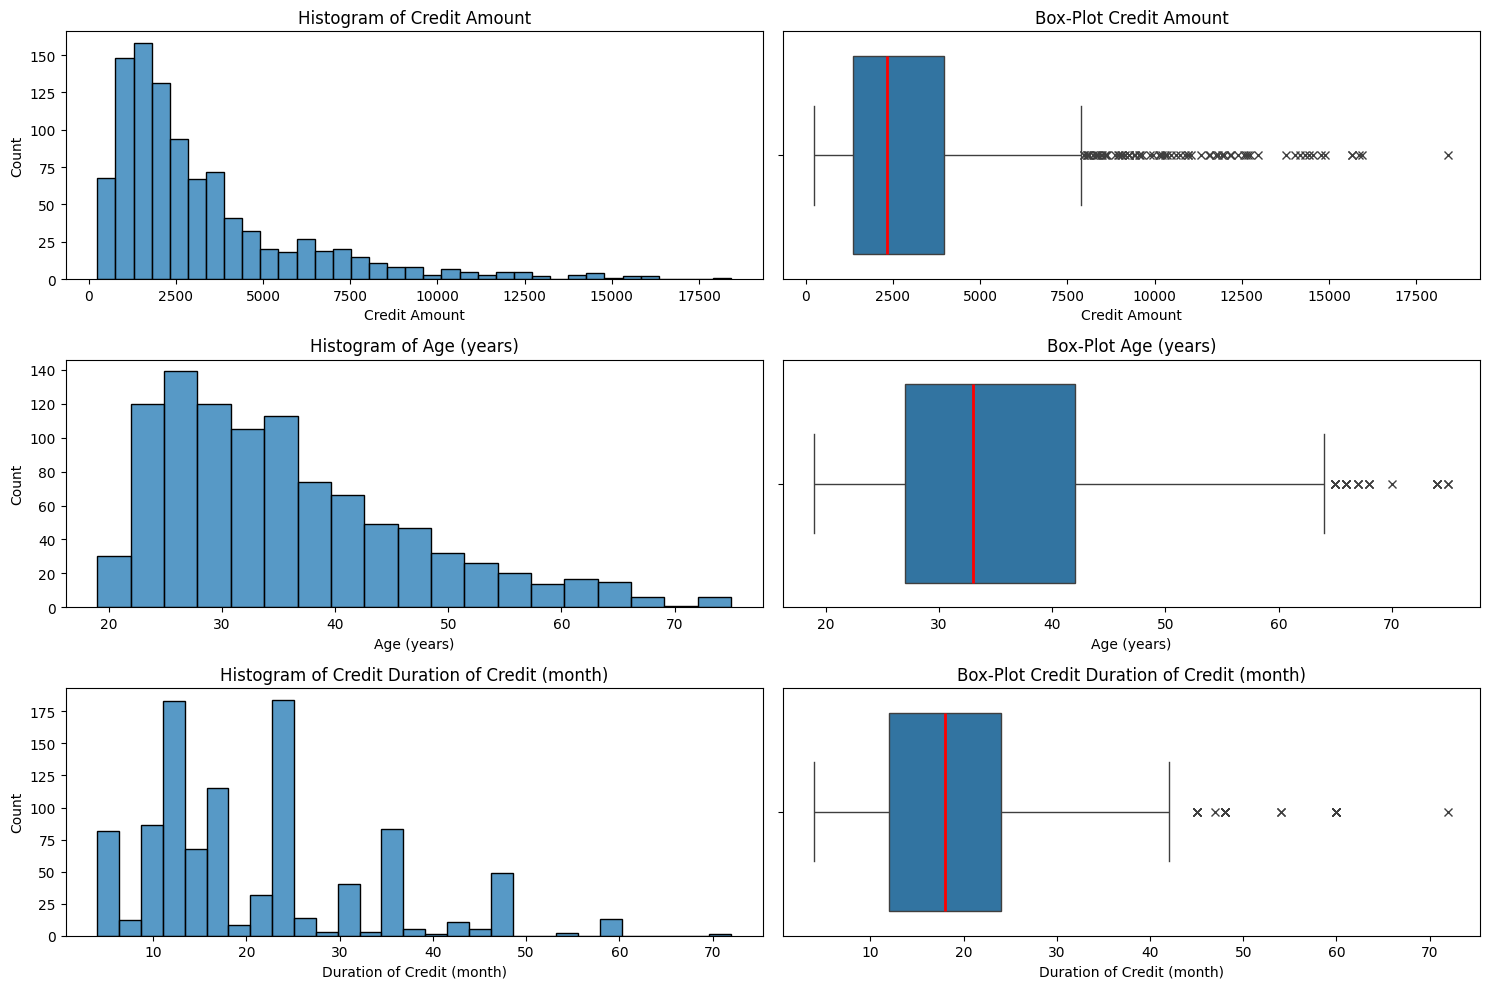

In [ ]:
## Create a 2*4 plot figure
fig, axes = plt.subplots(3,2, figsize=(15,10))

## 0,0
sns.histplot(x = df1['Credit Amount'],ax=axes[0,0], stat="count")
axes[0,0].set_title("Histogram of Credit Amount")
## 0,1
sns.boxplot(x = df1['Credit Amount'],ax=axes[0,1], flierprops={"marker": "x"},
            medianprops={"color": "r", "linewidth": 2},notch=False, showcaps=True)
axes[0,1].set_title("Box-Plot Credit Amount")

## 1,0
sns.histplot(x = df1['Age (years)'],ax=axes[1,0], stat="count")
axes[1,0].set_title("Histogram of Age (years)")
## 1,1
sns.boxplot(x = df1['Age (years)'],ax=axes[1,1], flierprops={"marker": "x"},
            medianprops={"color": "r", "linewidth": 2}, notch=False, showcaps=True)
axes[1,1].set_title("Box-Plot Age (years)")

## 2,0
sns.histplot(x = df1['Duration of Credit (month)'],ax=axes[2,0], stat="count")
axes[2,0].set_title("Histogram of Credit Duration of Credit (month)")
## 2,1
sns.boxplot(x = df1['Duration of Credit (month)'],ax=axes[2,1],flierprops={"marker": "x"},
            medianprops={"color": "r", "linewidth": 2}, notch=False, showcaps=True)
axes[2,1].set_title("Box-Plot Credit Duration of Credit (month)")

plt.tight_layout()
plt.show()

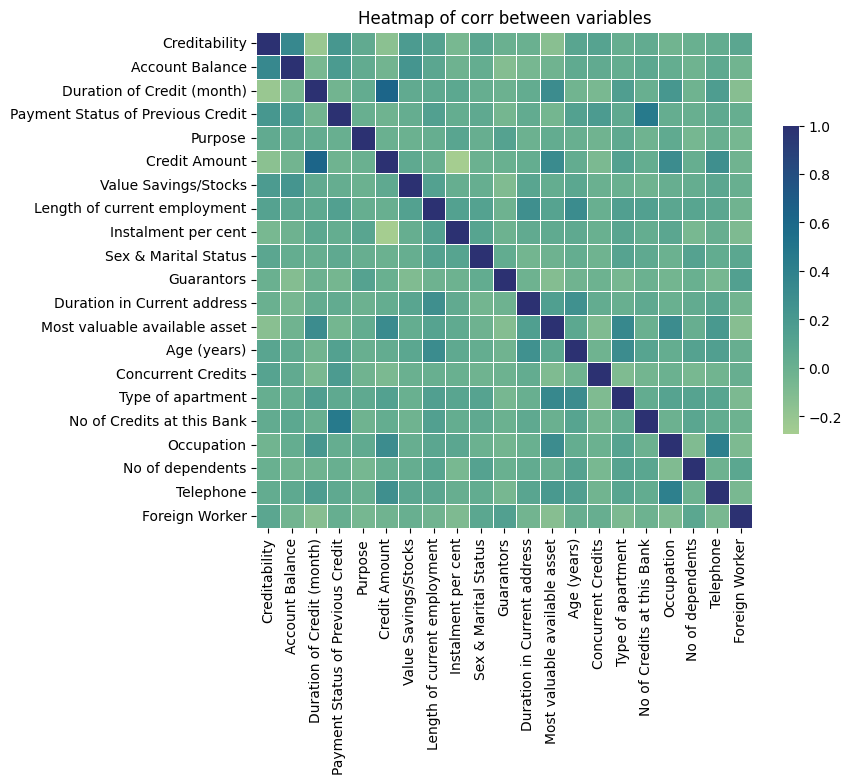

In [ ]:
data_heatmap = df1.copy()

plt.figure(figsize=(8,8))
sns.heatmap(data_heatmap.corr(),
    annot=False,
    cmap="crest",
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5})
plt.title("Heatmap of corr between variables", fontsize=12)
plt.show()

#### 3. Train Test Split

In [ ]:
y = df1['Creditability']
X = df1.drop('Creditability', axis=1)

In [ ]:
## Split Data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.4, random_state=44)

### 4. Modeling

In [ ]:
# Logistic Regression
glm = LogisticRegression(random_state=44, solver='lbfgs', multi_class='multinomial', max_iter=1000)

cv_params = {'C': 10**np.linspace(-3,3,50)
             }

# 3. Define a set of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# 4. Instantiate the GridSearchCV object
glm1 = GridSearchCV(glm, param_grid = cv_params, scoring=scoring, cv=5, refit='f1')

glm1.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000,
                                          multi_class='multinomial',
                                          random_state=44),
             param_grid={'C': array([1.00000000e-03, 1.32571137e-03, 1.75751062e-03, 2.32995181e-03,
       3.08884360e-03, 4.09491506e-03, 5.42867544e-03, 7.19685673e-03,
       9.54095476e-03, 1.26485522e-02, 1.67683294e-02, 2.22299648e-02,
       2.94705170e-02, 3.90693994e-02, 5.17947468e-0...
       2.68269580e+00, 3.55648031e+00, 4.71486636e+00, 6.25055193e+00,
       8.28642773e+00, 1.09854114e+01, 1.45634848e+01, 1.93069773e+01,
       2.55954792e+01, 3.39322177e+01, 4.49843267e+01, 5.96362332e+01,
       7.90604321e+01, 1.04811313e+02, 1.38949549e+02, 1.84206997e+02,
       2.44205309e+02, 3.23745754e+02, 4.29193426e+02, 5.68986603e+02,
       7.54312006e+02, 1.00000000e+03])},
             refit='f1', scoring={'recall', 'precision', 'f1', 'accuracy'})

In [ ]:
y_glm = glm1.predict(X_test)

In [ ]:
print(classification_report(y_test, y_glm))

              precision    recall  f1-score   support

           0       0.70      0.29      0.41       128
           1       0.74      0.94      0.83       272

    accuracy                           0.73       400
   macro avg       0.72      0.62      0.62       400
weighted avg       0.73      0.73      0.69       400



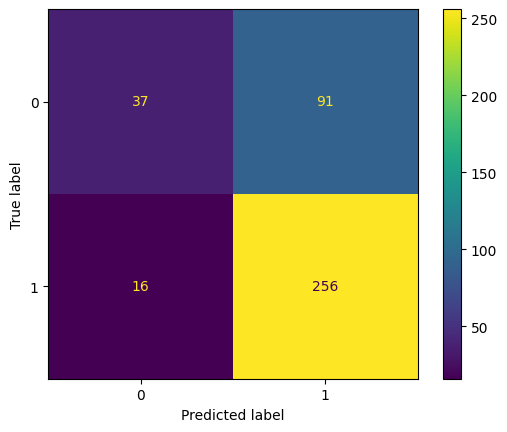

In [ ]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, y_glm, labels=glm1.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=glm1.classes_,
                             )
disp.plot(values_format='');

In [ ]:
### make result for train dataset
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
    model_name (string): what you want the model to be called in the output table
    model_object: a fit GridSearchCV object
    metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy],
                        },
                       )

    return table

In [ ]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
    model_name (string): Your choice: how the model will be named in the output table
    preds: numpy array of test predictions
    y_test_data: numpy array of y_test data

    Out:
    table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy]
                        })

    return table

In [ ]:
logistic_result = make_results('Logistic_CV', glm1, 'f1')
logistic_result

,model,precision,recall,F1,accuracy
0,Logistic_CV,0.771799,0.955622,0.8538,0.766667


In [ ]:
logistic_test_scores = get_test_scores('Logistic Test', y_glm, y_test)
logistic_test_scores

results_table = pd.DataFrame()
results_table = pd.concat([logistic_result, logistic_test_scores], axis=0)
results_table

,model,precision,recall,F1,accuracy
0,Logistic_CV,0.771799,0.955622,0.853800,0.766667
0,Logistic Test,0.737752,0.941176,0.827141,0.732500


In [ ]:
### Navies Bayes
gnb = GaussianNB()

cv_params = {'var_smoothing': [1e-8, 1e-9, 1e-10, 1e-11,1e-12, 1e-13]}

# 3. Define a set of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# 4. Instantiate the GridSearchCV object
gnb1 = GridSearchCV(gnb, param_grid = cv_params, scoring=scoring, cv=5, refit='f1')

gnb1.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-08, 1e-09, 1e-10, 1e-11, 1e-12,
                                           1e-13]},
             refit='f1', scoring={'recall', 'precision', 'f1', 'accuracy'})

In [ ]:

# Get the predictions on test data
y_gnb_preds = gnb1.predict(X_test)

In [ ]:
print(classification_report(y_test, gnb1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.63      0.45      0.52       128
           1       0.77      0.88      0.82       272

    accuracy                           0.74       400
   macro avg       0.70      0.66      0.67       400
weighted avg       0.73      0.74      0.73       400



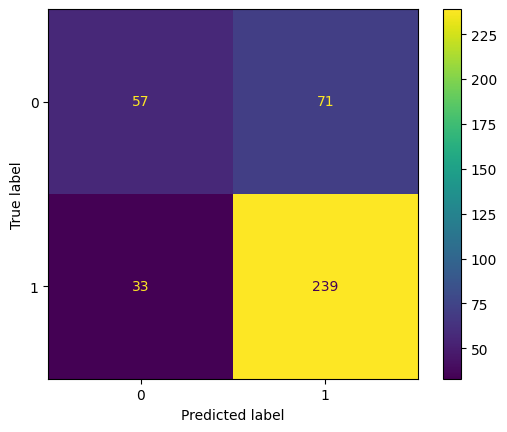

In [ ]:
# Compute values for confusion matrix
gnb_cm = confusion_matrix(y_test, y_gnb_preds, labels=gnb1.classes_)

# Create display of confusion matrix
gnb_disp = ConfusionMatrixDisplay(confusion_matrix=gnb_cm, display_labels=gnb1.classes_)

# Plot confusion matrix
gnb_disp.plot()

# Display plot
plt.show()

In [ ]:
gnb_result = make_results('Naive_Bayes_CV', gnb1, 'f1')
gnb_test_scores = get_test_scores('Naive_Bayes_Test', y_gnb_preds, y_test)

results_table = pd.concat([results_table, gnb_result, gnb_test_scores], axis=0)
results_table

,model,precision,recall,F1,accuracy
0,Logistic_CV,0.771799,0.955622,0.853800,0.766667
0,Logistic Test,0.737752,0.941176,0.827141,0.732500
0,Naive_Bayes_CV,0.800203,0.864542,0.830462,0.748333
0,Naive_Bayes_Test,0.770968,0.878676,0.821306,0.740000


In [ ]:
## Decision Tree

# 1. Instantiate the decision tree classifier
tree = DecisionTreeClassifier(random_state=44)

# 2. Create a dictionary of hyperparameters to tune


#creterion The function to measure the quality of a split
#criterion = ['gini','entropy', 'log_loss']

# The strategy used to choose the split at each node
#splitter = ['best', 'random']

#The number of features to consider when looking for the best split
max_features = [int(x) for x in np.linspace(1,20, num = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 20, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(2, 15, num = 5)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(1, 15, num = 5)]


cv_params = {  'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}


# 3. Define a set of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# 4. Instantiate the GridSearchCV object
tree1 = GridSearchCV(tree, param_grid = cv_params, scoring=scoring, cv=5, refit='f1')

In [ ]:
%%time
tree1.fit(X_train, y_train)

CPU times: user 2min 22s, sys: 800 ms, total: 2min 23s
Wall time: 2min 24s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=44),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 20, None],
                         'max_features': [1, 3, 5, 7, 9, 11, 13, 15, 17, 20],
                         'min_samples_leaf': [1, 4, 8, 11, 15],
                         'min_samples_split': [2, 5, 8, 11, 15]},
             refit='f1', scoring={'recall', 'precision', 'f1', 'accuracy'})

In [ ]:
y_tree_preds = tree1.predict(X_test)

In [ ]:
print(classification_report(y_test, tree1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.51      0.45      0.48       128
           1       0.76      0.79      0.77       272

    accuracy                           0.69       400
   macro avg       0.63      0.62      0.63       400
weighted avg       0.68      0.69      0.68       400



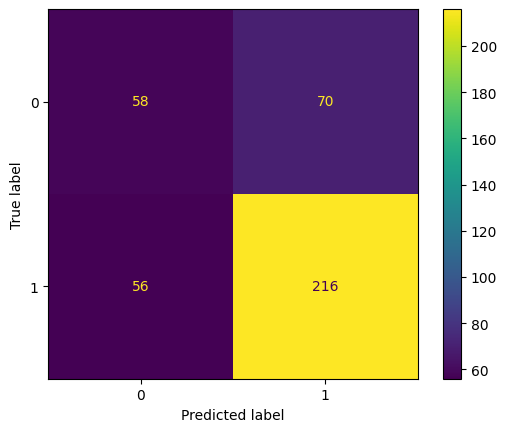

In [ ]:
# Compute values for confusion matrix
tree_cm = confusion_matrix(y_test, y_tree_preds, labels=tree1.classes_)

# Create display of confusion matrix
tree_disp = ConfusionMatrixDisplay(confusion_matrix=tree_cm, display_labels=tree1.classes_)

# Plot confusion matrix
tree_disp.plot()

# Display plot
plt.show()

In [ ]:
tree_result = make_results('DecisionTree_CV', tree1, 'f1')
tree_test_scores = get_test_scores('DecisionTree_Test', y_tree_preds, y_test)

results_table = pd.concat([results_table, tree_result, tree_test_scores], axis=0)
results_table

,model,precision,recall,F1,accuracy
0,Logistic_CV,0.771799,0.955622,0.853800,0.766667
0,Logistic Test,0.737752,0.941176,0.827141,0.732500
0,Naive_Bayes_CV,0.800203,0.864542,0.830462,0.748333
0,Naive_Bayes_Test,0.770968,0.878676,0.821306,0.740000
0,DecisionTree_CV,0.785211,0.897127,0.837343,0.751667
0,DecisionTree_Test,0.755245,0.794118,0.774194,0.685000


In [ ]:
## Random Forest
%%time

## Random Hyperparameter Grid
rf = RandomForestClassifier(random_state=44)

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 300, num = 10)]
# Number of features to consider at every split
#max_features = ['auto', 'sqrt']
max_features =[float(x) for x in np.linspace(start=0.0, stop=1.0, num = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(3,10, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(2, 15, num = 10)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(3, 15, num = 10)]
# Method of selecting samples for training each tree
bootstrap = [True, False]


random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

## RandomizedSearchCV
rf_cv = RandomizedSearchCV(estimator = rf,
                               param_distributions = random_grid,
                               n_iter = 100,
                               cv = 5,
                               verbose=100,
                               random_state=44,
                               n_jobs = -1)
# Fit the random search model
rf_cv.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
55 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

CPU times: user 3.01 s, sys: 285 ms, total: 3.3 s
Wall time: 2min 37s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=44),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 4, 6, 8, 10, None],
                                        'max_features': [0.0,
                                                         0.1111111111111111,
                                                         0.2222222222222222,
                                                         0.3333333333333333,
                                                         0.4444444444444444,
                                                         0.5555555555555556,
                                                         0.6666666666666666,
                                                         0.7777777777777777,
                                                         0.8888888888888888,
                                                         1.0],
                                        'min_samples_leaf': [3, 4, 5, 7, 8, 9,
                                                             11, 12, 13, 15],
                                        'min_samples_split': [2, 3, 4, 6, 7, 9,
                                                              10, 12, 13, 15],
                                        'n_estimators': [1, 34, 67, 100, 133,
                                                         167, 200, 233, 266,
                                                         300]},
                   random_state=44, verbose=100)

In [ ]:
rf_cv.best_params_

{'n_estimators': 300,
 'min_samples_split': 6,
 'min_samples_leaf': 3,
 'max_features': 0.5555555555555556,
 'max_depth': None,
 'bootstrap': True}

In [ ]:
print(classification_report(y_test, rf_cv.predict(X_test)))

              precision    recall  f1-score   support

           0       0.70      0.47      0.56       128
           1       0.78      0.90      0.84       272

    accuracy                           0.77       400
   macro avg       0.74      0.69      0.70       400
weighted avg       0.76      0.77      0.75       400



In [ ]:
,### Grid Search
# 1. Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=44)

# 2. Create a dictionary of hyperparameters to tune
# Note that this example only contains 1 value for each parameter for simplicity,
# but you should assign a dictionary with ranges of values
cv_params = {'max_depth': [66],
             'max_features': [0.9, 0.8421052631578947],
             'max_samples': [0.60],
             'min_samples_leaf': [4],
             'min_samples_split': [4],
             'n_estimators': [250,278],
             'bootstrap' : [True]
             }

# 3. Define a set of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# 4. Instantiate the GridSearchCV object
rf1 = GridSearchCV(rf, param_grid = cv_params, scoring=scoring, cv=5, refit='f1')

In [ ]:
%%time
rf1.fit(X_train, y_train)

CPU times: user 15.1 s, sys: 75.2 ms, total: 15.2 s
Wall time: 16.5 s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=44),
             param_grid={'bootstrap': [True], 'max_depth': [66],
                         'max_features': [0.9, 0.8421052631578947],
                         'max_samples': [0.6], 'min_samples_leaf': [4],
                         'min_samples_split': [4], 'n_estimators': [250, 278]},
             refit='f1', scoring={'recall', 'precision', 'f1', 'accuracy'})

In [ ]:
rf1.best_params_

{'bootstrap': True,
 'max_depth': 66,
 'max_features': 0.9,
 'max_samples': 0.6,
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 250}

In [ ]:
y_rf_preds = rf1.predict(X_test)

In [ ]:
print(classification_report(y_test, rf1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.70      0.45      0.55       128
           1       0.78      0.91      0.84       272

    accuracy                           0.76       400
   macro avg       0.74      0.68      0.69       400
weighted avg       0.75      0.76      0.75       400



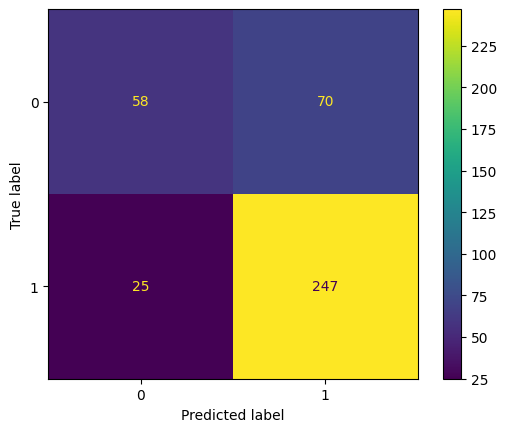

In [ ]:
# Compute values for confusion matrix
rf_cm = confusion_matrix(y_test, y_rf_preds, labels=rf1.classes_)

# Create display of confusion matrix
rf_disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=rf1.classes_)

# Plot confusion matrix
rf_disp.plot()

# Display plot
plt.show()

In [ ]:
rf_result = make_results('RandomForest_CV', rf1, 'f1')
rf_test_scores = get_test_scores('RandomForest_Test', y_rf_preds, y_test)

results_table = pd.concat([results_table, rf_result, rf_test_scores], axis=0)
results_table

,model,precision,recall,F1,accuracy
0,Logistic_CV,0.771799,0.955622,0.853800,0.766667
0,Logistic Test,0.737752,0.941176,0.827141,0.732500
0,Naive_Bayes_CV,0.800203,0.864542,0.830462,0.748333
0,Naive_Bayes_Test,0.770968,0.878676,0.821306,0.740000
0,DecisionTree_CV,0.785211,0.897127,0.837343,0.751667
0,DecisionTree_Test,0.755245,0.794118,0.774194,0.685000
0,RandomForest_CV,0.784755,0.908892,0.842079,0.756667
0,RandomForest_Test,0.779180,0.908088,0.838710,0.762500


In [ ]:
##XGBoost
%%time

xgb = XGBClassifier()

#Analogous to the learning rate in GBM.
eta = [float(x) for x in np.linspace(0.01,0.2, 10)]
#The maximum depth of a tree. Used to control over-fitting.
max_depth = [int(x) for x in np.linspace(3,10,8)]
#The maximum number of terminal nodes or leaves in a tree.
max_leaf_nodes = [int(x) for x in np.linspace(3,10,5)]
#Denotes the fraction of columns to be random samples for each tree.
colsample_bytree = [float(x) for x in np.linspace(0.5,1, 10)]
#Denotes the fraction of observations to be random samples for each tree
subsample = [float(x) for x in np.linspace(0.5,1, 10)]

random_grid_xgb = {'eta': eta,
                     'max_depth' : max_depth,
                     'max_leaf_nodes': max_leaf_nodes,
                     'colsample_bytree': colsample_bytree,
                     'subsample': subsample}

## RandomizedSearchCV
xgb_cv = RandomizedSearchCV(estimator = xgb,
                               param_distributions = random_grid_xgb,
                               n_iter = 100,
                               cv = 5,
                               verbose=100,
                               random_state=44,
                               n_jobs = -1)
# Fit the random search model
xgb_cv.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [16:02:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_leaf_nodes" } are not used.

  warnings.warn(smsg, UserWarning)


CPU times: user 1.55 s, sys: 117 ms, total: 1.67 s
Wall time: 37.8 s


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                                0.09444444444444444,
                                                0.11555555555555555,
                                                0.1366666666666667,
                                                0.1577777777777778,
                                                0.1788888888888889, 0.2],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                                        'max_leaf_nodes': [3, 4, 6, 8, 10],
                                        'subsample': [0.5, 0.5555555555555556,
                                                      0.6111111111111112,
                                                      0.6666666666666666,
                                                      0.7222222222222222,
                                                      0.7777777777777778,
                                                      0.8333333333333333,
                                                      0.8888888888888888,
                                                      0.9444444444444444,
                                                      1.0]},
                   random_state=44, verbose=100)

In [ ]:
xgb_cv.best_params_

{'subsample': 0.6666666666666666,
 'max_leaf_nodes': 8,
 'max_depth': 5,
 'eta': 0.052222222222222225,
 'colsample_bytree': 0.6111111111111112}

In [ ]:
print(classification_report(y_test, xgb_cv.predict(X_test)))

              precision    recall  f1-score   support

           0       0.70      0.42      0.53       128
           1       0.77      0.92      0.84       272

    accuracy                           0.76       400
   macro avg       0.74      0.67      0.68       400
weighted avg       0.75      0.76      0.74       400



In [ ]:
,### Grid Search
# 1. Instantiate the random forest classifier
xgb = XGBClassifier()

# 2. Create a dictionary of hyperparameters to tune
# Note that this example only contains 1 value for each parameter for simplicity,
# but you should assign a dictionary with ranges of values
cv_params = {'eta': [0.052222222222222225,0.1],
             'max_depth' : [5,7,9],
             #'max_leaf_nodes': [8,9],
             'colsample_bytree': [0.6111111111111112,0.9],
             'subsample': [0.6666666666666666,0.9]}

# 3. Define a set of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# 4. Instantiate the GridSearchCV object
xgb1 = GridSearchCV(xgb, param_grid = cv_params, scoring=scoring, cv=5, refit='f1')

In [ ]:
%%time
xgb1.fit(X_train, y_train)

CPU times: user 19.6 s, sys: 373 ms, total: 19.9 s
Wall time: 11.5 s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.6111111111111112, 0.9],
                         'eta': [0.052222222222222225, 0.1],
                         'max_depth': [5, 7, 9],
                         'subsample': [0.6666666666666666, 0.9]},
             refit='f1', scoring={'recall', 'precision', 'f1', 'accuracy'})

In [ ]:
y_xgb_preds = xgb1.predict(X_test)

In [ ]:
print(classification_report(y_test, y_xgb_preds))

              precision    recall  f1-score   support

           0       0.70      0.42      0.53       128
           1       0.77      0.92      0.84       272

    accuracy                           0.76       400
   macro avg       0.74      0.67      0.68       400
weighted avg       0.75      0.76      0.74       400



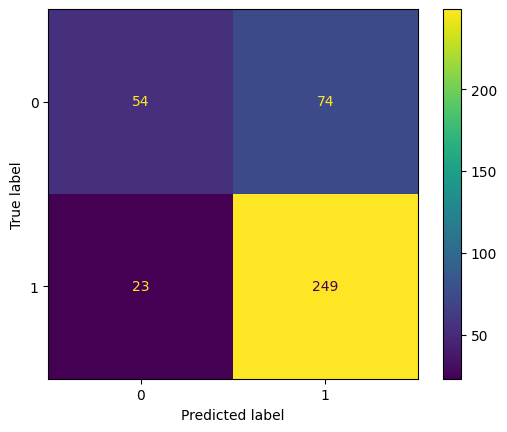

In [ ]:
# Compute values for confusion matrix
xgb_cm = confusion_matrix(y_test, y_xgb_preds, labels=xgb1.classes_)

# Create display of confusion matrix
xgb_disp = ConfusionMatrixDisplay(confusion_matrix=xgb_cm, display_labels=xgb1.classes_)

# Plot confusion matrix
xgb_disp.plot()

# Display plot
plt.show()

In [ ]:
xgb_result = make_results('XGBoost_CV', xgb1, 'f1')
xgb_test_scores = get_test_scores('XGBoost_Test', y_xgb_preds, y_test)

results_table = pd.concat([results_table, xgb_result, xgb_test_scores], axis=0)
results_table

,model,precision,recall,F1,accuracy
0,Logistic_CV,0.771799,0.955622,0.853800,0.766667
0,Logistic Test,0.737752,0.941176,0.827141,0.732500
0,Naive_Bayes_CV,0.800203,0.864542,0.830462,0.748333
0,Naive_Bayes_Test,0.770968,0.878676,0.821306,0.740000
0,DecisionTree_CV,0.785211,0.897127,0.837343,0.751667
0,DecisionTree_Test,0.755245,0.794118,0.774194,0.685000
0,RandomForest_CV,0.784755,0.908892,0.842079,0.756667
0,RandomForest_Test,0.779180,0.908088,0.838710,0.762500
0,XGBoost_CV,0.797596,0.918222,0.853471,0.775000
0,XGBoost_Test,0.770898,0.915441,0.836975,0.757500


In [ ]:
train_results_table = pd.DataFrame()
train_results_table = pd.concat([logistic_result, gnb_result, tree_result, rf_result, xgb_result], axis=0)
train_results_table

,model,precision,recall,F1,accuracy
0,Logistic_CV,0.771799,0.955622,0.853800,0.766667
0,Naive_Bayes_CV,0.800203,0.864542,0.830462,0.748333
0,DecisionTree_CV,0.785211,0.897127,0.837343,0.751667
0,RandomForest_CV,0.784755,0.908892,0.842079,0.756667
0,XGBoost_CV,0.797596,0.918222,0.853471,0.775000


In [ ]:
test_results_table = pd.DataFrame()
test_results_table = pd.concat([logistic_test_scores, gnb_test_scores, tree_test_scores, rf_test_scores, xgb_test_scores], axis=0)
test_results_table

,model,precision,recall,F1,accuracy
0,Logistic Test,0.737752,0.941176,0.827141,0.7325
0,Naive_Bayes_Test,0.770968,0.878676,0.821306,0.7400
0,DecisionTree_Test,0.755245,0.794118,0.774194,0.6850
0,RandomForest_Test,0.779180,0.908088,0.838710,0.7625
0,XGBoost_Test,0.770898,0.915441,0.836975,0.7575


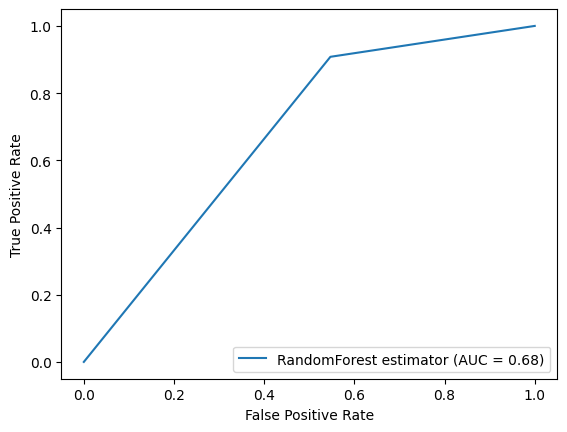

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_rf_preds)
roc_auc = auc(fpr, tpr)
display_rf = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='RandomForest estimator')
display_rf.plot()

plt.show()

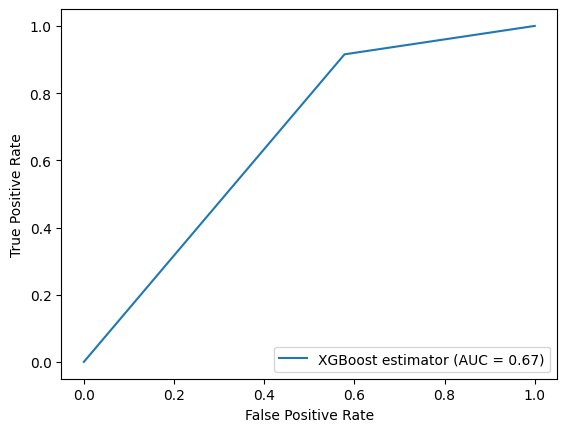

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_xgb_preds)
roc_auc = auc(fpr, tpr)
display_xgb = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='XGBoost estimator')
display_xgb.plot()

plt.show()

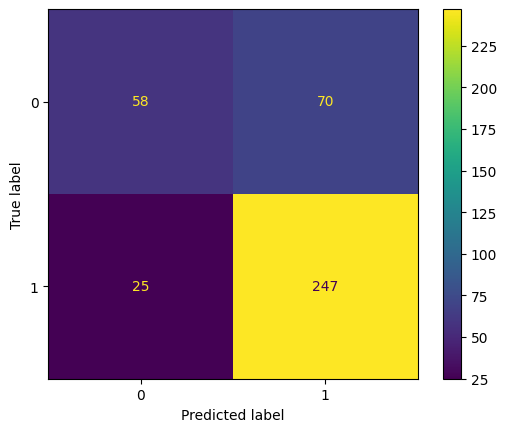

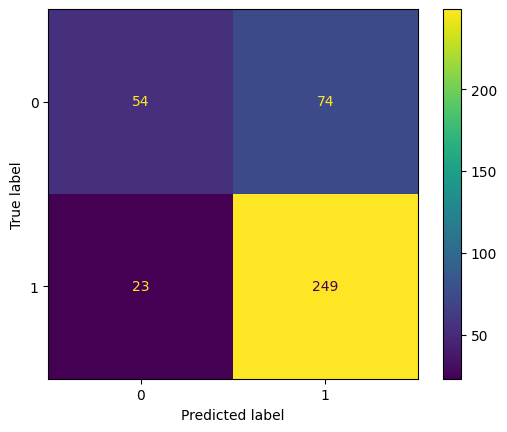

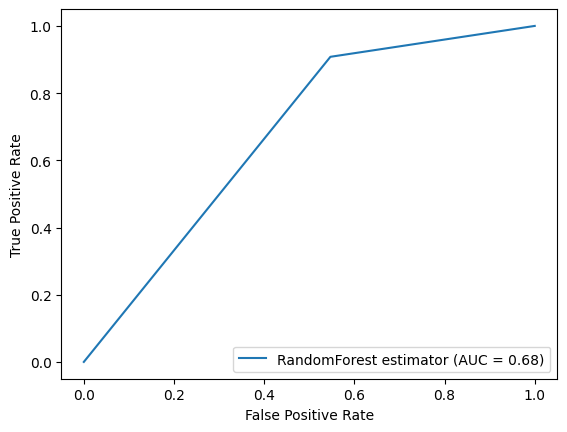

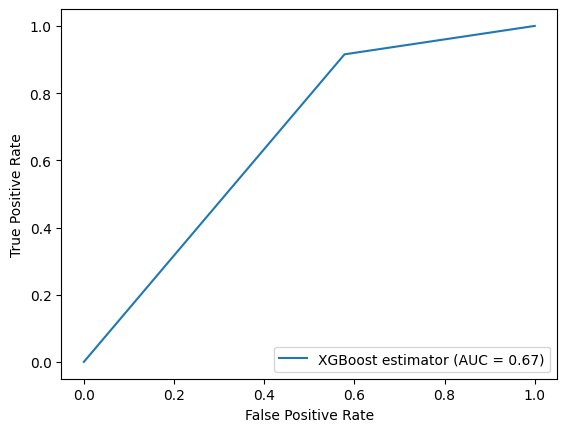

In [ ]:
rf_disp.plot()
xgb_disp.plot()

display_rf.plot()
display_xgb.plot()